In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('PS_20174392719_1491204439457_log.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<AxesSubplot:ylabel='isFraud'>

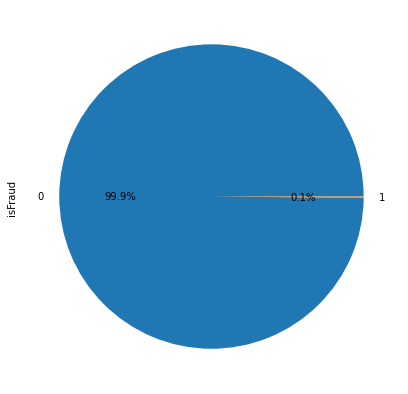

In [5]:
fig,ax=plt.subplots(figsize=[7,7])
data.isFraud.value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax)#Wide disparity

Text(0.5, 1.0, 'Normal')

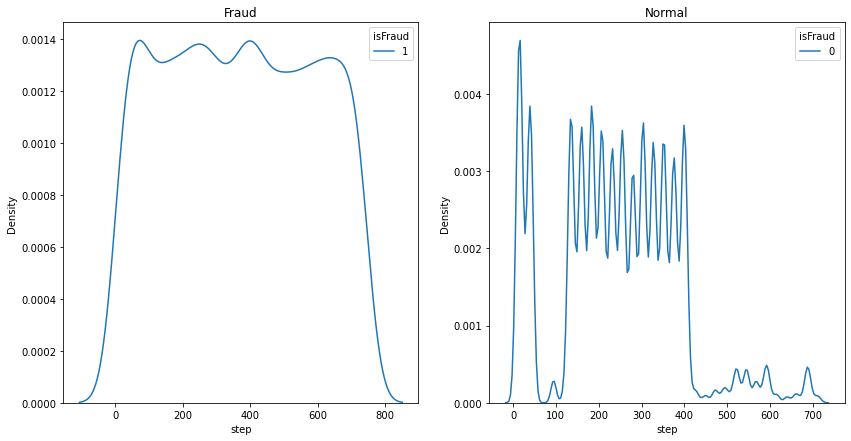

In [6]:
fig,ax=plt.subplots(1,2,figsize=[14,7])
sns.kdeplot(x='step',hue='isFraud',data=data.query('isFraud==1'),ax=ax[0])
ax[0].set_title('Fraud')
sns.kdeplot(x='step',hue='isFraud',data=data.query('isFraud==0'),ax=ax[1])
ax[1].set_title('Normal')
# If the step is between 80 and 120, 430 and 730, it is very suspicious

Text(0.5, 1.0, 'Normal')

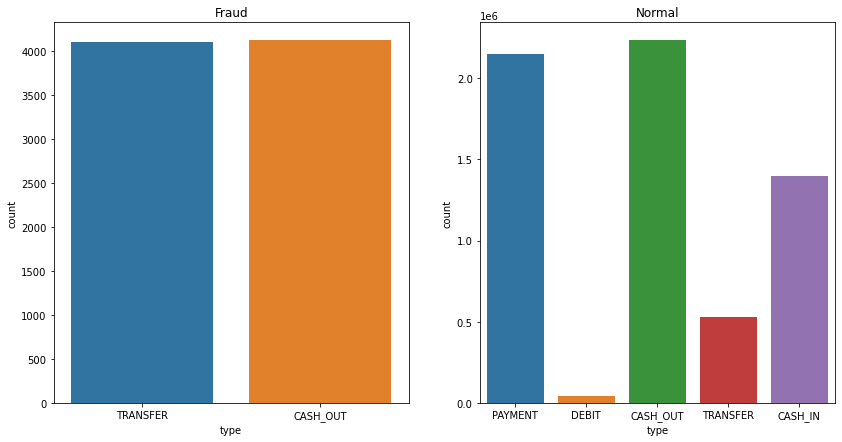

In [7]:
fig,ax=plt.subplots(1,2,figsize=[14,7])
sns.countplot(x='type',data=data.query('isFraud==1'),ax=ax[0])
ax[0].set_title('Fraud')
sns.countplot(x='type',data=data.query('isFraud==0'),ax=ax[1])
ax[1].set_title('Normal')
#Look at the types of fraudulent transactions

Text(0.5, 1.0, 'Normal')

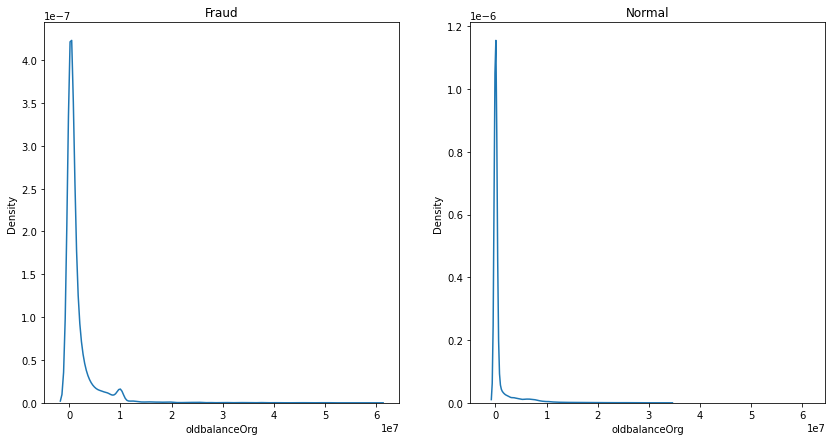

In [8]:
fig,ax=plt.subplots(1,2,figsize=[14,7],sharex=True)
sns.kdeplot(x='oldbalanceOrg',data=data.query('isFraud==1'),ax=ax[0])
ax[0].set_title('Fraud')
sns.kdeplot(x='oldbalanceOrg',data=data.iloc[:100000].query('isFraud==0'),ax=ax[1])#this is a normal sample of 100,000
ax[1].set_title('Normal')
#Take a look at the previous account balances of the victims of fraud

Text(0.5, 1.0, 'Normal')

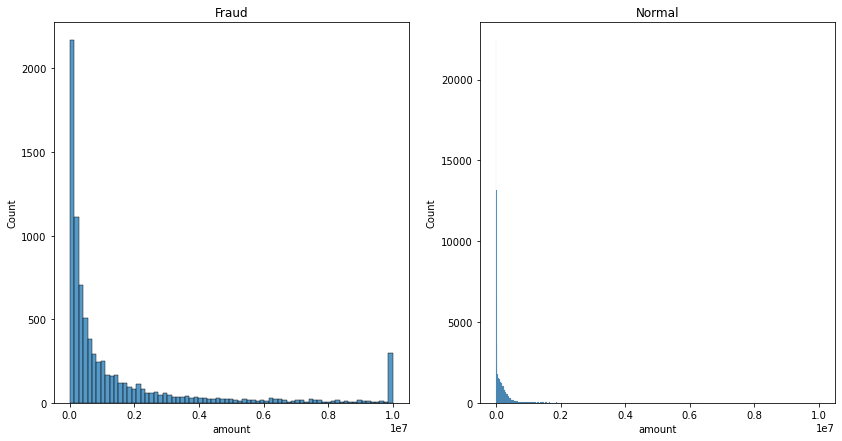

In [9]:
fig,ax=plt.subplots(1,2,figsize=[14,7],sharex=True)
sns.histplot(x='amount',data=data.query('isFraud==1'),ax=ax[0])
ax[0].set_title('Fraud')
sns.histplot(x='amount',data=data.iloc[:100000].query('isFraud==0'),ax=ax[1])#There's only 100，000 of them in the normal sample
ax[1].set_title('Normal')
#amount vs Fraud As can be seen here, the amount of normal transactions is much lower than the amount of fraud

(0.0, 10000000.0)

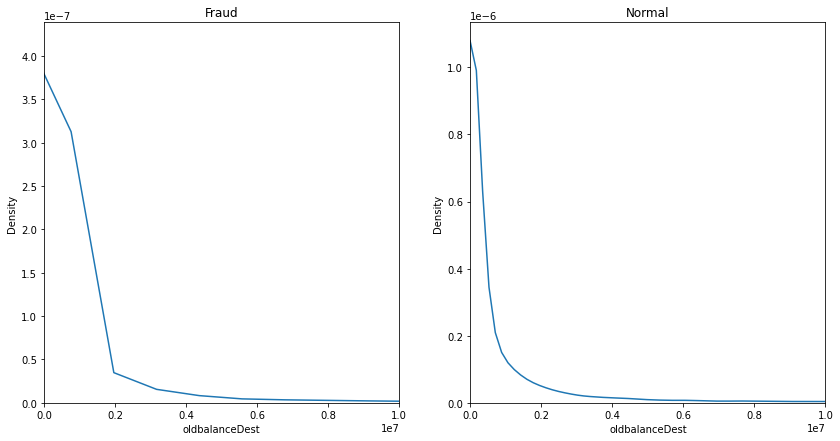

In [10]:
fig,ax=plt.subplots(1,2,figsize=[14,7],sharex=True)
sns.kdeplot(x='oldbalanceDest',data=data.query('isFraud==1'),ax=ax[0])
ax[0].set_title('Fraud')
sns.kdeplot(x='oldbalanceDest',data=data.iloc[:100000].query('isFraud==0'),ax=ax[1])#this is a normal sample of 10,000
ax[1].set_title('Normal')
plt.xlim(0,1e7)
#It's just the opposite of the previous one
#Those who commit fraud will have less money transferred to their accounts

In [11]:
data.describe().transpose()#See descriptive statistics

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


<AxesSubplot:>

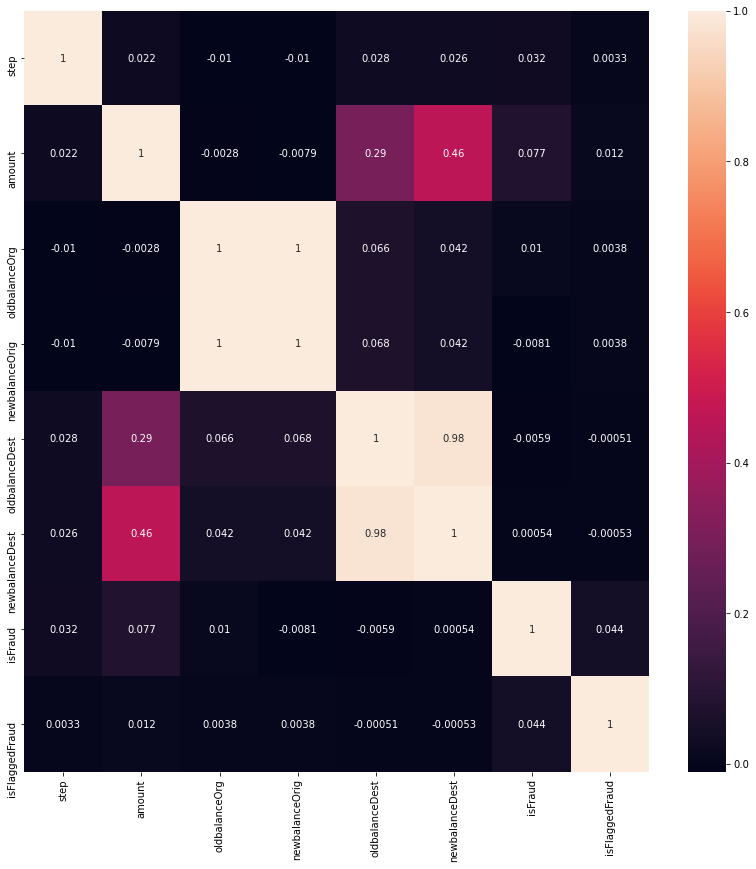

In [12]:
fig,ax=plt.subplots(figsize=[14,14],sharex=True)#Correlation heat map
sns.heatmap(data.corr(),annot=True,ax=ax)#The characteristics have no linear relationship with ISFraud, so the linear model can be excluded

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder 

In [14]:
data.pop('nameOrig')
data.pop('nameDest')
oe=OrdinalEncoder().fit(data.loc[:,['type']])
data.type=oe.transform(data.loc[:,['type']])

In [15]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3.0,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3.0,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4.0,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1.0,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3.0,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1.0,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4.0,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1.0,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4.0,850002.52,850002.52,0.00,0.00,0.00,1,0
